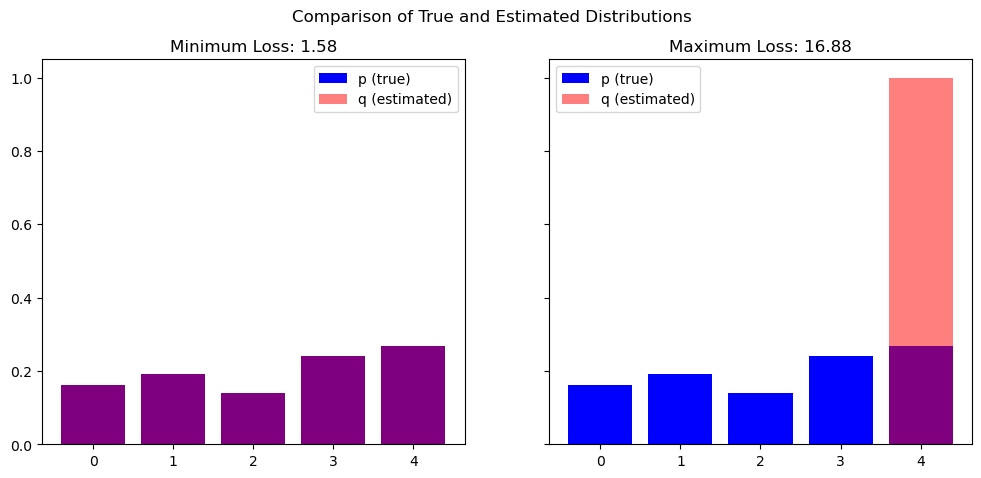

(1.5808541192108736, 16.879393703038186)

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    """Compute softmax values for each set of scores in z."""
    e_z = np.exp(z - np.max(z))  # for numerical stability
    return e_z / e_z.sum(axis=0)

def cross_entropy_loss(p, q):
    """Calculate the cross-entropy loss between two distributions."""
    return -np.sum(p * np.log(q))

def min_max_cross_entropy_with_softmax(n_bins):
    # Generate random logits and apply softmax
    logits_p = np.random.rand(n_bins)
    logits_q = np.random.rand(n_bins)
    p = softmax(logits_p)
    q = softmax(logits_q)
    
    # Minimum cross-entropy loss when p and q are identical
    min_loss = cross_entropy_loss(p, p)
    
    # Let's simulate a divergent q for maximum loss
    # Making q divergent by assigning very small probability close to zero to the largest p
    q_max_case = np.ones(n_bins) * (1e-10)
    q_max_case[np.argmax(p)] = 1 - (n_bins - 1) * 1e-10
    max_loss = cross_entropy_loss(p, q_max_case)
    
    return min_loss, max_loss

def min_max_cross_entropy_with_softmax_plot(n_bins):
    # Generate random logits and apply softmax for both p and q
    logits_p = np.random.rand(n_bins)
    p = softmax(logits_p)
    
    # Minimum cross-entropy loss when q is identical to p
    q_identical = np.copy(p)
    min_loss = cross_entropy_loss(p, q_identical)
    
    # Let's simulate a divergent q for maximum loss
    # Making q divergent by assigning very small probability close to zero to the largest p
    q_divergent = np.ones(n_bins) * (1e-10)
    q_divergent[np.argmax(p)] = 1 - (n_bins - 1) * 1e-10
    max_loss = cross_entropy_loss(p, q_divergent)
    
    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    # Plot for minimum loss
    axes[0].bar(range(n_bins), p, color='b', label='p (true)')
    axes[0].bar(range(n_bins), q_identical, alpha=0.5, color='r', label='q (estimated)')
    axes[0].set_title(f'Minimum Loss: {min_loss:.2f}')
    axes[0].legend()
    
    # Plot for maximum loss
    axes[1].bar(range(n_bins), p, color='b', label='p (true)')
    axes[1].bar(range(n_bins), q_divergent, alpha=0.5, color='r', label='q (estimated)')
    axes[1].set_title(f'Maximum Loss: {max_loss:.2f}')
    axes[1].legend()
    
    plt.suptitle('Comparison of True and Estimated Distributions')
    plt.show()
    
    return min_loss, max_loss

# Example with 5 bins
min_max_cross_entropy_with_softmax_plot(5)


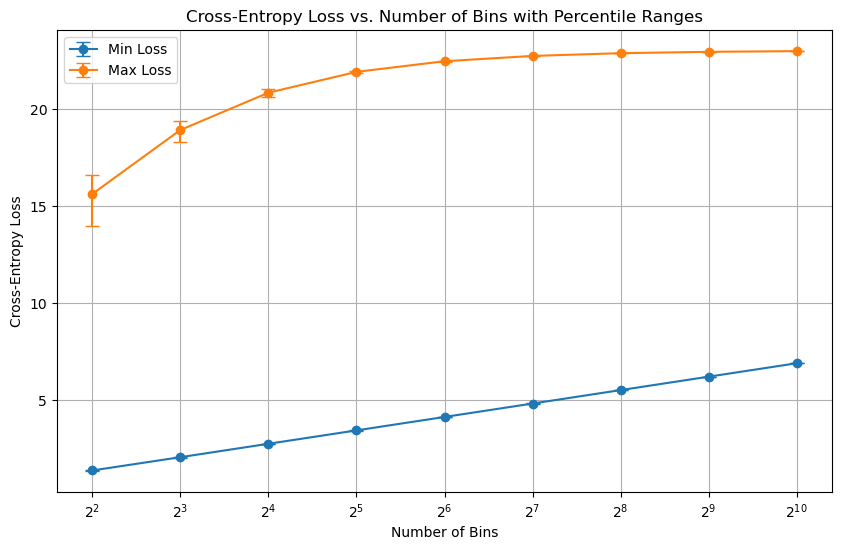

In [44]:
# Bins to test
bins = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
n_trials = 50
mean_min_losses = []
mean_max_losses = []
percentile_5th_min_losses = []
percentile_95th_min_losses = []
percentile_5th_max_losses = []
percentile_95th_max_losses = []

# Compute losses for each bin count
for n_bin in bins:
    min_losses = []
    max_losses = []
    for _ in range(n_trials):
        min_loss, max_loss = min_max_cross_entropy_with_softmax(n_bin)
        min_losses.append(min_loss)
        max_losses.append(max_loss)
    mean_min_losses.append(np.mean(min_losses))
    mean_max_losses.append(np.mean(max_losses))
    percentile_5th_min_losses.append(np.percentile(min_losses, 5))
    percentile_95th_min_losses.append(np.percentile(min_losses, 95))
    percentile_5th_max_losses.append(np.percentile(max_losses, 5))
    percentile_95th_max_losses.append(np.percentile(max_losses, 95))

# Plotting results
plt.figure(figsize=(10, 6))
plt.errorbar(bins, mean_min_losses, yerr=[np.array(mean_min_losses) - np.array(percentile_5th_min_losses), 
                                          np.array(percentile_95th_min_losses) - np.array(mean_min_losses)], 
             label='Min Loss', fmt='-o', capsize=5)
plt.errorbar(bins, mean_max_losses, yerr=[np.array(mean_max_losses) - np.array(percentile_5th_max_losses), 
                                          np.array(percentile_95th_max_losses) - np.array(mean_max_losses)], 
             label='Max Loss', fmt='-o', capsize=5)
plt.xscale('log', base=2)
plt.xlabel('Number of Bins')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss vs. Number of Bins with Percentile Ranges')
plt.legend()
plt.grid(True)
plt.show()


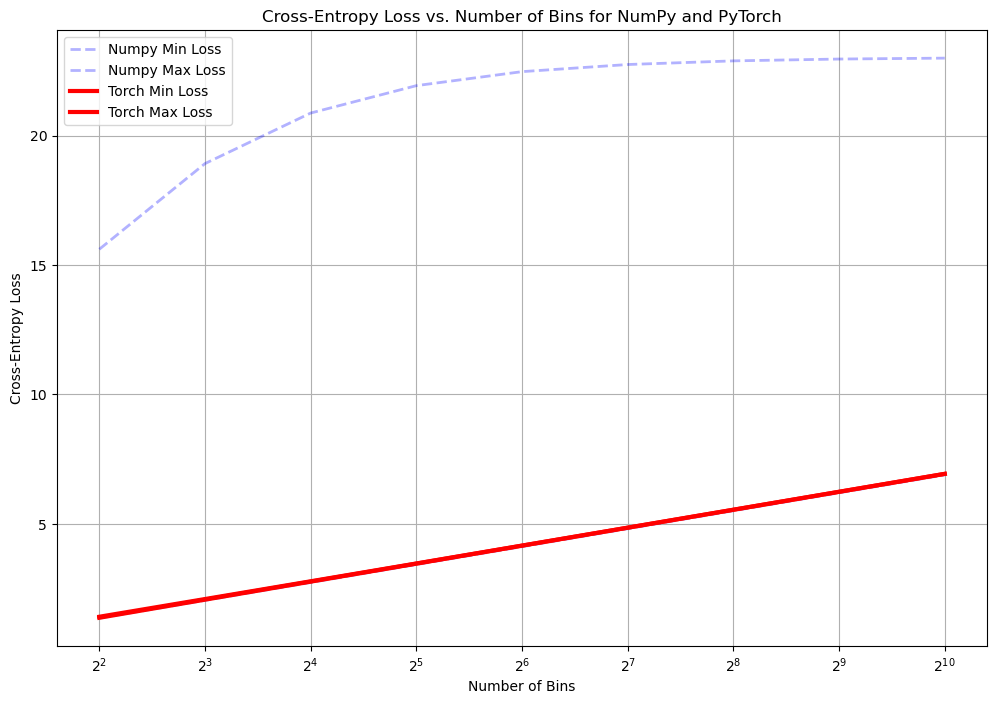

In [47]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def numpy_softmax(z):
    """Compute softmax values for each set of scores in z using NumPy."""
    e_z = np.exp(z - np.max(z))
    return e_z / e_z.sum(axis=0)

def numpy_cross_entropy_loss(p, q):
    """Calculate the cross-entropy loss between two distributions using NumPy."""
    return -np.sum(p * np.log(q))

def torch_softmax(z):
    """Compute softmax values for each set of scores in z using PyTorch."""
    return torch.nn.functional.softmax(torch.tensor(z), dim=0).numpy()

def torch_cross_entropy_loss(p, q):
    """Calculate the cross-entropy loss between two distributions using PyTorch."""
    return torch.nn.functional.cross_entropy(torch.tensor([q]), torch.tensor([p]), reduction='none').item()

def compute_losses(n_bins, use_torch=False):
    """Compute min and max cross-entropy losses using softmax for distributions with n_bins."""
    logits = np.random.rand(n_bins)
    if use_torch:
        p = torch_softmax(logits)
        q_identical = np.copy(p)
        min_loss = torch_cross_entropy_loss(p, q_identical)
        
        q_divergent = np.ones(n_bins) * (1e-10)
        q_divergent[np.argmax(p)] = 1 - (n_bins - 1) * 1e-10
        max_loss = torch_cross_entropy_loss(p, q_divergent)
    else:
        p = numpy_softmax(logits)
        q_identical = np.copy(p)
        min_loss = numpy_cross_entropy_loss(p, q_identical)
        
        q_divergent = np.ones(n_bins) * (1e-10)
        q_divergent[np.argmax(p)] = 1 - (n_bins - 1) * 1e-10
        max_loss = numpy_cross_entropy_loss(p, q_divergent)
    
    return min_loss, max_loss

# Settings
bins = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
n_trials = 50

results = {'numpy': {'min': [], 'max': []}, 'torch': {'min': [], 'max': []}}

# Compute losses for each implementation and bin count
for n_bin in bins:
    min_losses_np, max_losses_np = [], []
    min_losses_torch, max_losses_torch = [], []
    for _ in range(n_trials):
        min_loss_np, max_loss_np = compute_losses(n_bin, use_torch=False)
        min_loss_torch, max_loss_torch = compute_losses(n_bin, use_torch=True)
        min_losses_np.append(min_loss_np)
        max_losses_np.append(max_loss_np)
        min_losses_torch.append(min_loss_torch)
        max_losses_torch.append(max_loss_torch)
    results['numpy']['min'].append(np.mean(min_losses_np))
    results['numpy']['max'].append(np.mean(max_losses_np))
    results['torch']['min'].append(np.mean(min_losses_torch))
    results['torch']['max'].append(np.mean(max_losses_torch))

# Plotting results
plt.figure(figsize=(12, 8))
for key, color in [('numpy', 'b'), ('torch', 'r')]:
    line_style = '--' if key == 'numpy' else '-'
    alpha = 0.3 if key == 'numpy' else 1.0
    line_width = 2 if key == 'numpy' else 3
    plt.errorbar(bins, results[key]['min'], label=f'{key.capitalize()} Min Loss', fmt=line_style, color=color, capsize=5, alpha=alpha, linewidth=line_width)
    plt.errorbar(bins, results[key]['max'], label=f'{key.capitalize()} Max Loss', fmt=line_style, color=color, capsize=5, alpha=alpha, linewidth=line_width)

plt.xscale('log', base=2)
plt.xlabel('Number of Bins')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss vs. Number of Bins for NumPy and PyTorch')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/5c/x5dxs5nx73s3_0cfznwz3kbw0000gn/T/ipykernel_1392/2340069212.py:11: RuntimeWarning: divide by zero encountered in log
  return -np.sum(p * np.log(q))
/var/folders/5c/x5dxs5nx73s3_0cfznwz3kbw0000gn/T/ipykernel_1392/2340069212.py:11: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(p * np.log(q))


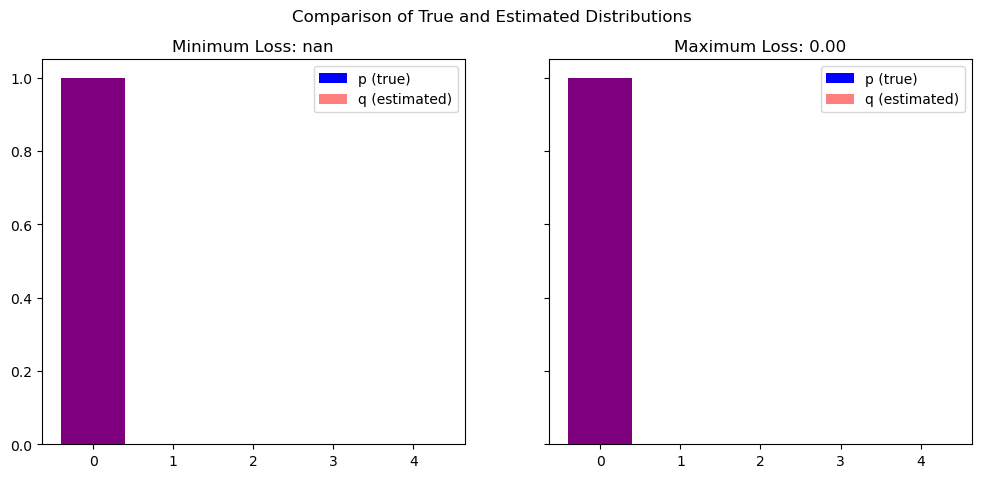

(nan, 4.000000331761484e-10)

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    """Compute softmax values for each set of scores in z."""
    e_z = np.exp(z - np.max(z))  # for numerical stability
    return e_z / e_z.sum()

def cross_entropy_loss(p, q):
    """Calculate the cross-entropy loss between two distributions."""
    return -np.sum(p * np.log(q))

def min_max_cross_entropy_with_softmax_plot(n_bins):
    # Generate a one-hot encoded p
    p = np.zeros(n_bins)
    p[np.random.randint(0, n_bins)] = 1
    
    # Generate random logits and apply softmax for q
    logits_q = np.random.rand(n_bins)
    q = softmax(logits_q)
    
    # Minimum cross-entropy loss when q is identical to p
    q_identical = np.copy(p)
    min_loss = cross_entropy_loss(p, q_identical)
    
    # Let's simulate a divergent q for maximum loss
    # Assigning very small probability close to zero to the one-hot index
    q_divergent = np.ones(n_bins) * (1e-10)
    q_divergent[np.argmax(p)] = 1 - (n_bins - 1) * 1e-10
    max_loss = cross_entropy_loss(p, q_divergent)
    
    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    # Plot for minimum loss
    axes[0].bar(range(n_bins), p, color='b', label='p (true)')
    axes[0].bar(range(n_bins), q_identical, alpha=0.5, color='r', label='q (estimated)')
    axes[0].set_title(f'Minimum Loss: {min_loss:.2f}')
    axes[0].legend()
    
    # Plot for maximum loss
    axes[1].bar(range(n_bins), p, color='b', label='p (true)')
    axes[1].bar(range(n_bins), q_divergent, alpha=0.5, color='r', label='q (estimated)')
    axes[1].set_title(f'Maximum Loss: {max_loss:.2f}')
    axes[1].legend()
    
    plt.suptitle('Comparison of True and Estimated Distributions')
    plt.show()
    
    return min_loss, max_loss

# Example with 5 bins
min_max_cross_entropy_with_softmax_plot(5)


In [3]:
import torch.nn as nn
import torch

In [11]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
output = loss(input, target)
output


tensor(1.8885, grad_fn=<DivBackward1>)

In [8]:
input

tensor([[ 1.0370, -1.5955,  0.8933,  1.8051, -2.8649],
        [-1.0144, -1.3716, -0.2008, -0.9645,  0.0577],
        [-0.1254, -0.6836,  0.5873,  2.3888,  1.9697]], requires_grad=True)

In [9]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
output = loss(input, input)


In [10]:
output


tensor(-4.9244, grad_fn=<DivBackward1>)